In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Columns :
1. Sex - Divided into 3 (M,F,I)
2. Diameter : It is perpendicular to Length measured in mm
3. Whole Weight : It is the entire weight of the shell.
4. Shucked Weight : It is the weight of the meat in the shell
5. Viscera Weight : Gut weight after bleeding (grams)
6. Shell Weight : Weight of the shell after reoving the meat and drving it
7. Age : Ring Count +1.5

### The above problem can be aproached in 2 ways
    1. Regression - By adding the Age as a column (ring+1.5)and droping Rings.
    2. Classification - Predicting the Rings Class

## Regression Approach   
Lets create a new column as age and drop Rings

In [4]:
df['Age'] = df['Rings']+1.5

In [5]:
df.drop('Rings',axis=1,inplace=True)

In [6]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [7]:
df.isnull().sum().any()

False

In [8]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

We see that theres one categorical column 'Sex' which will have to be taken care off.

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


We see that the min value for Height is 0 and that cannot be possible hence we could drop those rows

In [11]:
df[df['Height']== 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [12]:
df.drop([1257,3996],axis=0,inplace = True)

In [13]:
df.shape

(4175, 9)

### Univariate Analysis

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

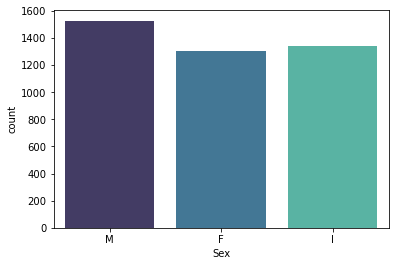

In [14]:
sns.countplot(df['Sex'],palette='mako')
df['Sex'].value_counts()

###### We see that there are 3 categories for sex
    male
    female
    Infant
Off which male has the highest count


<AxesSubplot:xlabel='Length', ylabel='Age'>

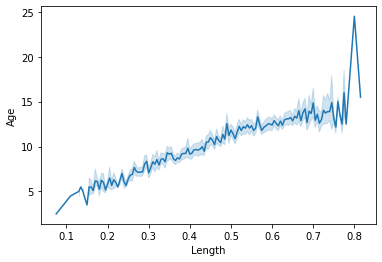

In [15]:
sns.lineplot(x=df['Length'],y=df['Age'])

We see that as the length increases, the rings increases

<AxesSubplot:xlabel='Diameter', ylabel='Age'>

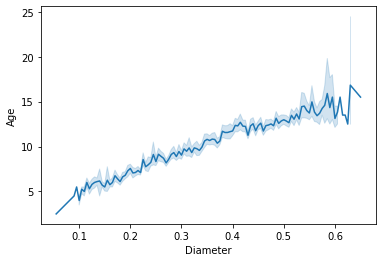

In [16]:
sns.lineplot(x=df['Diameter'],y=df['Age'])

We see that as the Diameter increases, the rings increase

<AxesSubplot:xlabel='Height', ylabel='Age'>

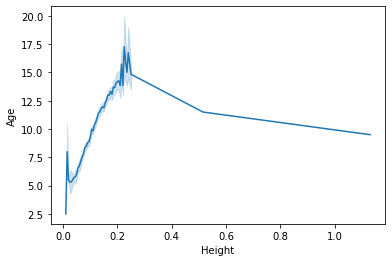

In [17]:
sns.lineplot(x=df['Height'],y=df['Age'])

We see that as the Height increases, the rings increase up untill 0.25 Height post which the Rings start decreasing

<AxesSubplot:xlabel='Whole weight', ylabel='Age'>

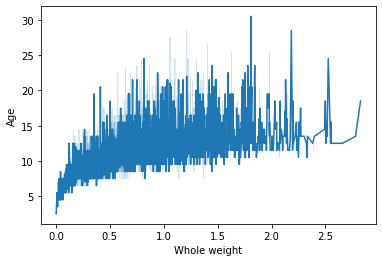

In [18]:
sns.lineplot(x=df['Whole weight'],y=df['Age'])

We see that as the Whole weight increases, the rings increase but in a moving range

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

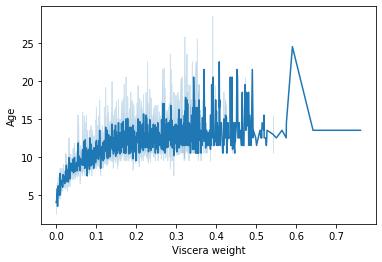

In [19]:
sns.lineplot(x=df['Viscera weight'],y=df['Age'])

We see that as the Viscera weight increases, the rings increase but in a moving range

<AxesSubplot:xlabel='Shell weight', ylabel='Age'>

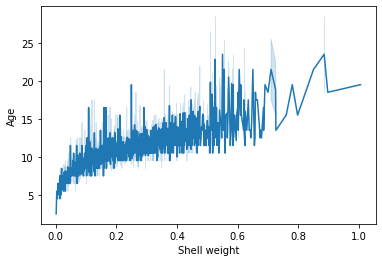

In [20]:
sns.lineplot(x=df['Shell weight'],y=df['Age'])

We see that as the Shell weight increases, the rings increase but in a moving range

### Bivariate Analysis

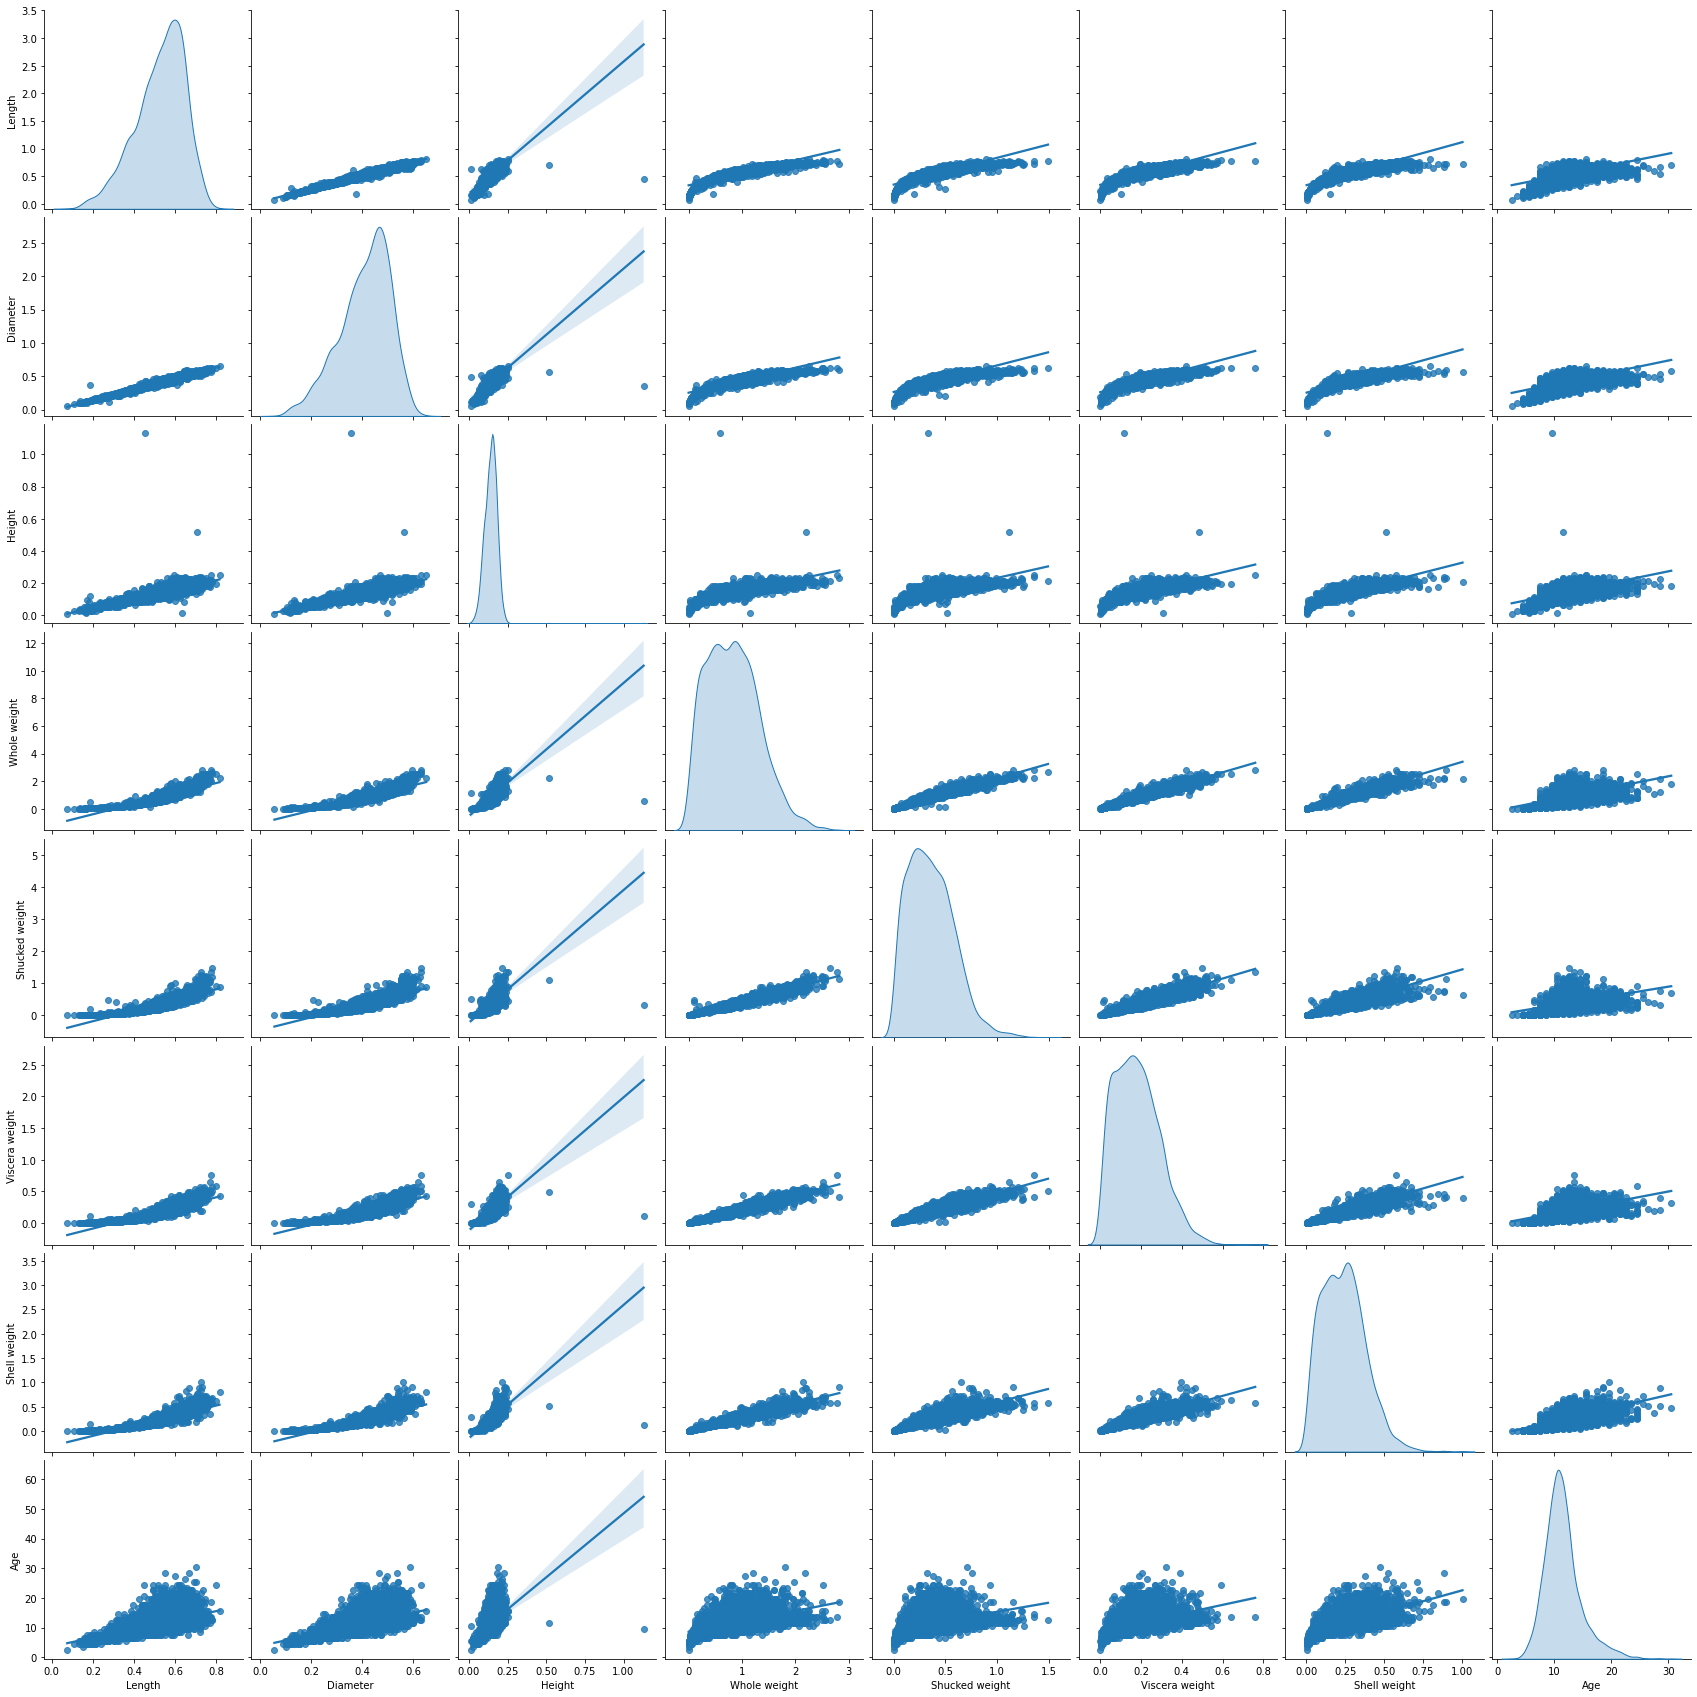

In [21]:
sns.pairplot(df,size=3,diag_kind='kde',kind='reg')

We see there is linear distribution in Diameter and Length, others have a non liner distribution.There is some noise in the data and the data is not normazlized

### Checking Correlation

In [22]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Age,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


<AxesSubplot:>

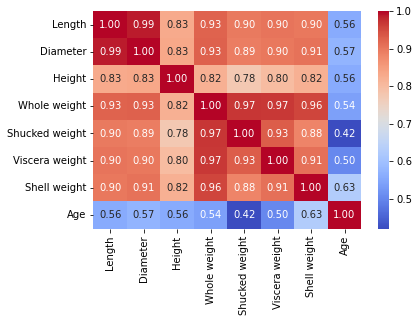

In [23]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')

There are no features having negitive colinearity.We see multiple Features having very high correlation which may be a case of multicolinearity.

##### Encoding categorical column

In [24]:
df = pd.get_dummies(df,columns=['Sex'])

In [25]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


### Checking Outliers

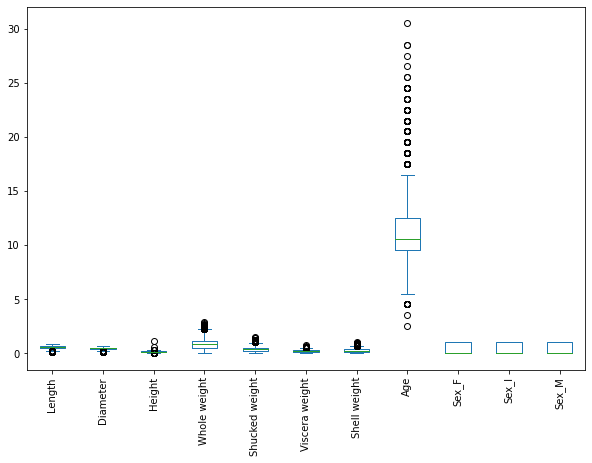

In [28]:
df.plot(kind='box',figsize=(10,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [29]:
from scipy.stats import zscore

(np.abs(zscore(df)<3).all())

Length             True
Diameter           True
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
Sex_F              True
Sex_I              True
Sex_M              True
dtype: bool

From the graph and zscore we see outliers present in Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age

### Removing Outliers

In [30]:
z = np.abs(zscore(df))
z.shape

(4175, 11)

In [31]:
df = df[(z<3).all(axis=1)]
df.shape

(4027, 11)

### Percentage Data loss

In [32]:
percentage_loss = (4175-4027)/4175*100
percentage_loss

3.5449101796407185

### Checking Distribution and skewness in Detail 

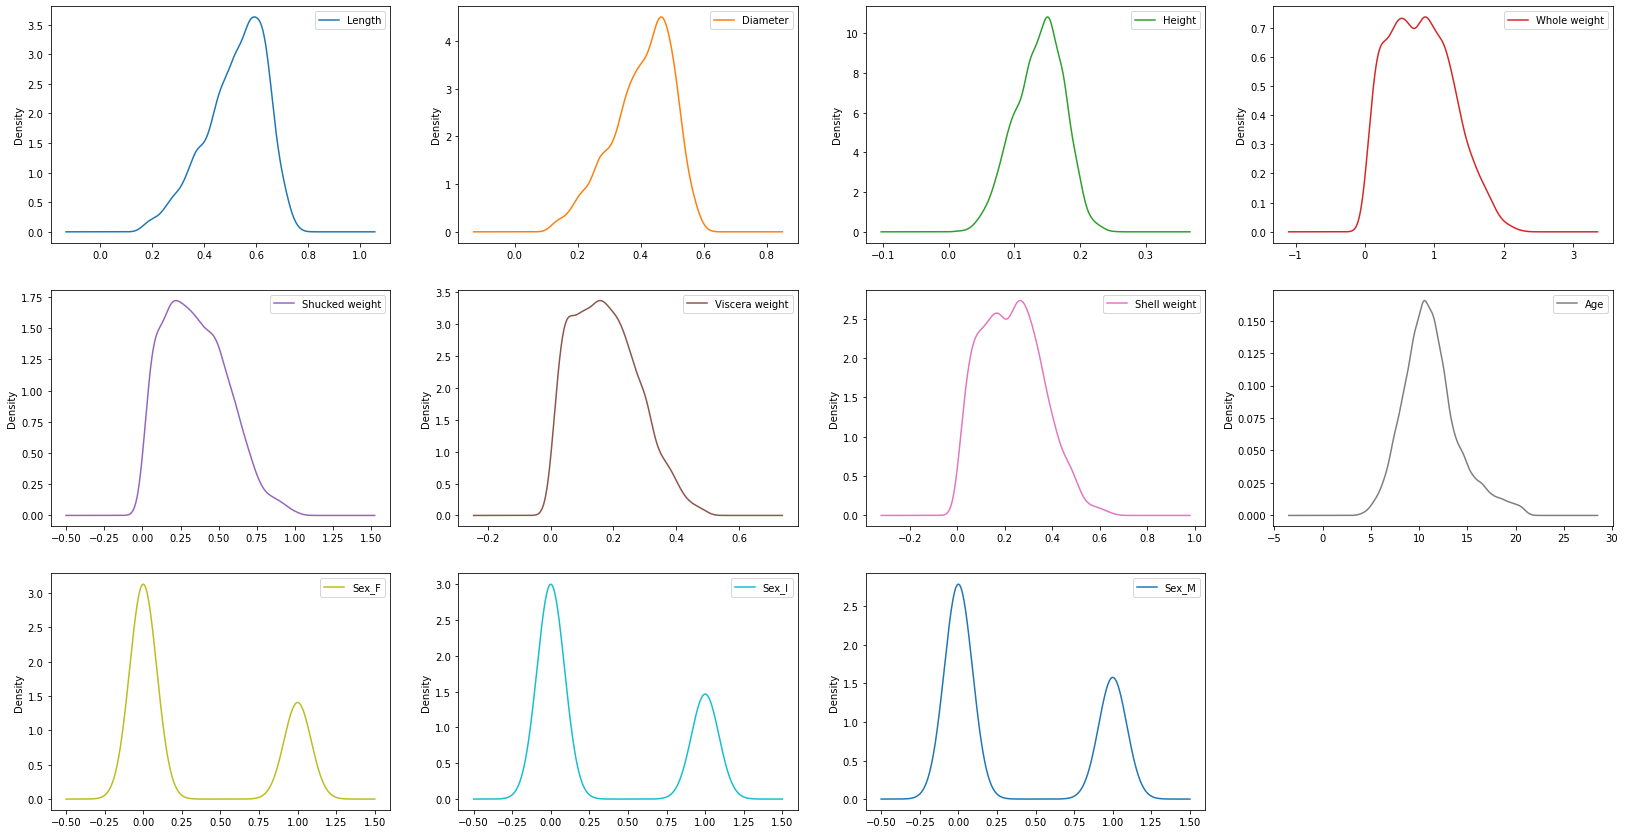

In [33]:
df.plot(kind='density',subplots=True,layout=(4,4),figsize=(28,20),sharex=False)
plt.show()

In [34]:
df.skew().sort_values(ascending=False)

Sex_F             0.821149
Sex_I             0.731618
Age               0.725464
Sex_M             0.576507
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Whole weight      0.334204
Height           -0.244251
Diameter         -0.598650
Length           -0.623076
dtype: float64

Keeping the skewness threshold as 0.75 we see skewness in Height,Shucked weight,Age

### Splitting the dataframe in x and y

In [35]:
x = df.drop('Age',axis=1)
x.shape

(4027, 10)

In [36]:
y = df['Age']
y.shape

(4027,)

##### Using power_transform to normallize the data

In [37]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [38]:
type(x_new)

numpy.ndarray

In [39]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,-0.670525,-0.699088,1.328833
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,-0.670525,-0.699088,1.328833
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,1.491368,-0.699088,-0.752540
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,-0.670525,-0.699088,1.328833
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,-0.670525,1.430434,-0.752540
...,...,...,...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,1.491368,-0.699088,-0.752540
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,-0.670525,-0.699088,1.328833
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,-0.670525,-0.699088,1.328833
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,1.491368,-0.699088,-0.752540


# Model 1: Regression Approach 
##### Keeping all the features with High Correlation and without vif

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

In [41]:
lr = LinearRegression()

for i in range(0,100):
    feature_train,feature_test,target_train,target_test = train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train = lr.predict(feature_train)
    pred_test = lr.predict(feature_test)
    print(f"At random state{i}, the training accuracy is : {r2_score(target_train,pred_train)}")
    print(f"At random state{i}, the testing accuracy is : {r2_score(target_test,pred_test)}")
    print()

At random state0, the training accuracy is : 0.5322820729046445
At random state0, the testing accuracy is : 0.4895749255648504

At random state1, the training accuracy is : 0.5257460458404932
At random state1, the testing accuracy is : 0.5080754455377481

At random state2, the training accuracy is : 0.5254390445122563
At random state2, the testing accuracy is : 0.5126321185801674

At random state3, the training accuracy is : 0.522552748869077
At random state3, the testing accuracy is : 0.520461916578145

At random state4, the training accuracy is : 0.5197028270243202
At random state4, the testing accuracy is : 0.5291526033644691

At random state5, the training accuracy is : 0.5304538151964346
At random state5, the testing accuracy is : 0.4972463590688869

At random state6, the training accuracy is : 0.5267213521115268
At random state6, the testing accuracy is : 0.5064595686918685

At random state7, the training accuracy is : 0.5353215171775054
At random state7, the testing accuracy is 

We see the highest accuracy at random_state 70

In [42]:
feature_train,feature_test,target_train,target_test = train_test_split(x,y,test_size=0.25,random_state=70)

In [44]:
lr.fit(feature_train,target_train)
pred_test = lr.predict(feature_test)
print(r2_score(target_test,pred_test)*100)

52.12426491940556


### Selecting Cross-Valiation for Model

In [45]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy for testing is {Test_accuracy}")
    print()

At cross fold 2 the cv score is 0.5181839296145822 and the accuracy score for training is -0.5389965564819623 and the accuracy for testing is 0.5212426491940556

At cross fold 3 the cv score is 0.5091526773733226 and the accuracy score for training is -0.5389965564819623 and the accuracy for testing is 0.5212426491940556

At cross fold 4 the cv score is 0.4494021808813364 and the accuracy score for training is -0.5389965564819623 and the accuracy for testing is 0.5212426491940556

At cross fold 5 the cv score is 0.4413134432328505 and the accuracy score for training is -0.5389965564819623 and the accuracy for testing is 0.5212426491940556

At cross fold 6 the cv score is 0.44963091465586724 and the accuracy score for training is -0.5389965564819623 and the accuracy for testing is 0.5212426491940556

At cross fold 7 the cv score is 0.458289409721492 and the accuracy score for training is -0.5389965564819623 and the accuracy for testing is 0.5212426491940556

At cross fold 8 the cv score

We see that Number of folds for Cross Validation doesnot make any significant difference to the Model, hence we select cv =5

In [46]:
def Model(model):
    model.fit(feature_train,target_train)
    model.score(feature_train,target_train)
    pred_decision = model.predict(feature_test)

    rfs = r2_score(target_test,pred_decision)
    print('R2 score is',rfs*100)

    rfscore = cross_val_score(model,x,y,cv=5)
    rfc = rfscore.mean()*100
    print('Cross Validation score is ', rfc)

In [47]:
feature_train,feature_test,target_train,target_test = train_test_split(x,y,test_size=0.25,random_state=70)

In [48]:
lr = LinearRegression()
Model(lr)

R2 score is 52.12426491940556
Cross Validation score is  44.13134432328505


In [49]:
ridge = Ridge()
Model(ridge)

R2 score is 52.08021476002356
Cross Validation score is  44.16398419443965


In [50]:
lasso = Lasso()
Model(lasso)

R2 score is 27.986932956445244
Cross Validation score is  16.158723318695642


In [51]:
dt = DecisionTreeRegressor()
Model(dt)

R2 score is 11.350766674109513
Cross Validation score is  -7.932830368100455


In [52]:
rf = RandomForestRegressor()
Model(rf)

R2 score is 52.690513198315855
Cross Validation score is  46.03488256107139


In [53]:
et = ExtraTreesRegressor()
Model(et)

R2 score is 52.55765453703975
Cross Validation score is  44.98739138877079


From Above we see that Random Forest has the Highest Score and can be selected for Hyper parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse','mae'],'n_estimators':list(range(1,100,20)),'max_depth':[4,5,6,7,8],'max_features':["auto", "sqrt", "log2"]}

In [66]:
gcv = GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
gcv.fit(feature_train,target_train)
gcv.best_params_

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1}

In [68]:
rf = RandomForestRegressor(criterion = 'mse', max_depth= 4, max_features = 'auto', n_estimators= 1)
Model(rf)

R2 score is 43.536841700838735
Cross Validation score is  33.24779341359923


We see that after hyper parameter tuning the accuracy is decreasing hence the best model would be RandomForest with default parameters

### Best Model RandomForest with default parameters

In [70]:
rf = RandomForestRegressor()
Model(rf)

R2 score is 52.28401914237371
Cross Validation score is  45.71484976596301


# Model 2 : Regression Approach

##### Dropping Features with High Correlation and  vif

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

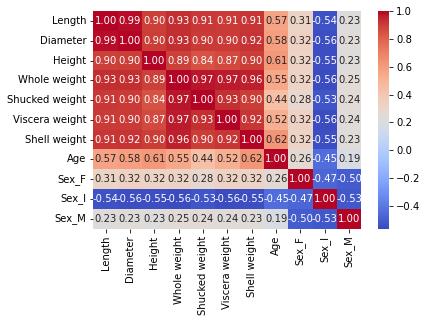

In [123]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')

We see that Length and Diameter and Whole Weight,Shucked weight,Viscera weight, Shell weight are highly correlated, dropping Diameter, Shucked weight,Viscera weight and Shell weight

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sma

In [126]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    dataset = sma.add_constant(dataset)
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])] 
    return(vif)

In [137]:
Features =df.drop(['Sex_F','Sex_I','Sex_M'],axis=1)
calculate_vif(Features)

,Features,VIF_Values
0,const,80.220800
1,Length,38.941251
2,Diameter,40.760210
3,Height,6.718631
4,Whole weight,110.964017
5,Shucked weight,31.979109
6,Viscera weight,17.208256
7,Shell weight,23.698879
8,Age,2.056137


 VIF needs to be below 10 and all the features except Height have a vif higher than 10.Age is a target varriable

From VIF and Correlation we see that Length and Diameter have a VIF above 10 and they have a correlation 99% between them, Hence we can drop Diameter

In [138]:
df_new = df.drop('Diameter',axis= 1)

Checking VIF and Correlation again

In [139]:
Features = df_new.drop(['Sex_F','Sex_I','Sex_M'],axis=1)
calculate_vif(Features)

,Features,VIF_Values
0,const,80.211920
1,Length,9.732008
2,Height,6.604588
3,Whole weight,110.961790
4,Shucked weight,31.935195
5,Viscera weight,17.177782
6,Shell weight,23.366757
7,Age,2.039501


<AxesSubplot:>

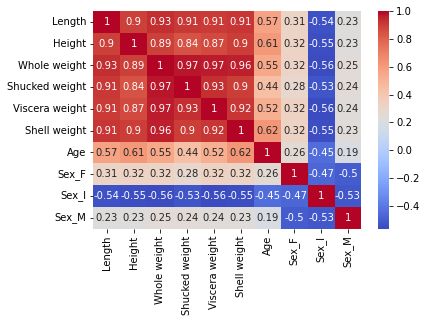

In [140]:
sns.heatmap(df_new.corr(),annot=True,cmap='coolwarm')

we see that there is a very high correlation between Whole weight, Shucked weight, Viscera weight and Shell weight. Hence rather than loosing out on data by deleting the column lets create a new column Weight with the average of all 4 weights



In [141]:
df_new['Average_Weight'] = (df_new['Whole weight']+df_new['Shucked weight']+df_new['Viscera weight']+df_new['Shell weight'])/4

In [142]:
df_new = df_new.drop(['Whole weight','Shucked weight','Viscera weight','Shell weight'],axis=1)

In [143]:
df_new

,Length,Height,Age,Sex_F,Sex_I,Sex_M,Average_Weight
0,0.455,0.095,16.5,0,0,1,0.247375
1,0.350,0.090,8.5,0,0,1,0.110875
2,0.530,0.135,10.5,1,0,0,0.321250
3,0.440,0.125,11.5,0,0,1,0.250125
4,0.330,0.080,8.5,0,1,0,0.097250
...,...,...,...,...,...,...,...
4172,0.565,0.165,12.5,1,0,0,0.436250
4173,0.590,0.135,11.5,0,0,1,0.470000
4174,0.600,0.205,10.5,0,0,1,0.574250
4175,0.625,0.150,11.5,1,0,0,0.545625


##### Re-checking vif 

In [145]:
Features = df_new.drop(['Sex_F','Sex_I','Sex_M'],axis=1)
calculate_vif(Features)

,Features,VIF_Values
0,const,75.218739
1,Length,9.588104
2,Height,6.265685
3,Age,1.614931
4,Average_Weight,9.311035


VIF for all the columns is below 10

### Splitting the dataframe in x and y

In [146]:
x = df_new.drop('Age',axis=1)
x.shape

(4027, 6)

In [147]:
y = df_new['Age']
y.shape

(4027,)

In [148]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [149]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,Length,Height,Sex_F,Sex_I,Sex_M,Average_Weight
0,-0.684451,-1.158933,-0.670525,-0.699088,1.328833,-0.599037
1,-1.411739,-1.280406,-0.670525,-0.699088,1.328833,-1.346375
2,-0.046219,-0.128305,1.491368,-0.699088,-0.752540,-0.231738
3,-0.799651,-0.395963,-0.670525,-0.699088,1.328833,-0.584933
4,-1.530577,-1.518600,-0.670525,1.430434,-0.752540,-1.426551
...,...,...,...,...,...,...
4022,0.289495,0.716250,1.491368,-0.699088,-0.752540,0.296678
4023,0.545081,-0.128305,-0.670525,-0.699088,1.328833,0.442830
4024,0.651129,1.943633,-0.670525,-0.699088,1.328833,0.871666
4025,0.926064,0.286070,1.491368,-0.699088,-0.752540,0.757147


### Scaling the Model

In [150]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = mms.fit_transform(x)
x

array([[0.32587672, 0.27546358, 0.        , 0.        , 1.        ,
        0.30714196],
       [0.1798726 , 0.25645617, 0.        , 0.        , 1.        ,
        0.14180814],
       [0.45400254, 0.43673039, 1.        , 0.        , 0.        ,
        0.38839966],
       ...,
       [0.59399609, 0.76093544, 0.        , 0.        , 1.        ,
        0.63250602],
       [0.64918964, 0.5015694 , 1.        , 0.        , 0.        ,
        0.60717092],
       [0.8591506 , 0.71116889, 0.        , 0.        , 1.        ,
        0.91810021]])

In [151]:
lr = LinearRegression()

for i in range(0,100):
    feature_train,feature_test,target_train,target_test = train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train = lr.predict(feature_train)
    pred_test = lr.predict(feature_test)
    print(f"At random state{i}, the training accuracy is : {r2_score(target_train,pred_train)}")
    print(f"At random state{i}, the testing accuracy is : {r2_score(target_test,pred_test)}")
    print()

At random state56, the training accuracy is : 0.3863838509315316
At random state56, the testing accuracy is : 0.38591357225520617
    

At random state0, the training accuracy is : 0.3942072302425844
At random state0, the testing accuracy is : 0.36006836616354554

At random state1, the training accuracy is : 0.3878570085755565
At random state1, the testing accuracy is : 0.37679916289134796

At random state2, the training accuracy is : 0.38556702387033537
At random state2, the testing accuracy is : 0.3884359204636254

At random state3, the training accuracy is : 0.38510868421708666
At random state3, the testing accuracy is : 0.3896049033673157

At random state4, the training accuracy is : 0.382749811295226
At random state4, the testing accuracy is : 0.3968789253634136

At random state5, the training accuracy is : 0.39595198470918036
At random state5, the testing accuracy is : 0.3572260455250822

At random state6, the training accuracy is : 0.39185982759577054
At random state6, the testing accuracy is : 0.36635523961437066

At random state7, the training accuracy is : 0.40208429880598984
At random state7, the testing acc

In [152]:
feature_train,feature_test,target_train,target_test = train_test_split(x,y,test_size=0.25,random_state=56)

In [153]:
lr = LinearRegression()
lr.fit(feature_train,target_train)
pred_test = lr.predict(feature_test)
print(r2_score(target_test,pred_test))

0.3878463663859003


In [154]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy for testing is {Test_accuracy}")
    print()

At cross fold 2 the cv score is 0.3811457808994761 and the accuracy score for training is -0.34273389274119115 and the accuracy for testing is 0.3878463663859003

At cross fold 3 the cv score is 0.37379581173784726 and the accuracy score for training is -0.34273389274119115 and the accuracy for testing is 0.3878463663859003

At cross fold 4 the cv score is 0.27955003594455935 and the accuracy score for training is -0.34273389274119115 and the accuracy for testing is 0.3878463663859003

At cross fold 5 the cv score is 0.2649740796135016 and the accuracy score for training is -0.34273389274119115 and the accuracy for testing is 0.3878463663859003

At cross fold 6 the cv score is 0.2962929143945967 and the accuracy score for training is -0.34273389274119115 and the accuracy for testing is 0.3878463663859003

At cross fold 7 the cv score is 0.3057153496355065 and the accuracy score for training is -0.34273389274119115 and the accuracy for testing is 0.3878463663859003

At cross fold 8 the 

In [155]:
def Model(model):
    model.fit(feature_train,target_train)
    model.score(feature_train,target_train)
    pred_decision = model.predict(feature_test)

    rfs = r2_score(target_test,pred_decision)
    print('R2 score is',rfs*100)

    rfscore = cross_val_score(model,x,y,cv=2)
    rfc = rfscore.mean()*100
    print('Cross Validation score is ', rfc)

In [156]:
Model(lr)

R2 score is 38.78463663859003
Cross Validation score is  38.11457808994761


In [157]:
Model(ridge)

R2 score is 38.66435540357032
Cross Validation score is  38.118622457574844


In [158]:
Model(lasso)

R2 score is -0.0013329389290550608
Cross Validation score is  -0.37664567037600793


In [159]:
Model(dt)

R2 score is -22.54094505533759
Cross Validation score is  -17.899386256792926


In [160]:
Model(rf)

R2 score is 34.473676996018455
Cross Validation score is  31.902648868449806


In [161]:
Model(et)

R2 score is 24.477232295542628
Cross Validation score is  23.45758868324608


##### The regression model with VIF has lesser accuracy compared to regression model without vif

## Model 3 : Classification Approach

In [41]:
df1 = pd.read_csv('abalone.csv')

In [42]:
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
df1[df1['Height']== 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [44]:
df1.drop([1257,3996],axis=0,inplace = True)

In [45]:
df1.shape

(4175, 9)

##### Encoding categorical column

In [46]:
df1 = pd.get_dummies(df1,columns=['Sex'])

In [47]:
df1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


### Checking Outliers

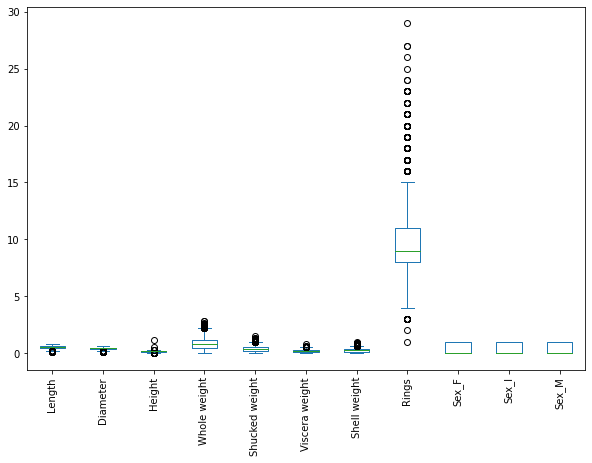

In [48]:
df1.plot(kind='box',figsize=(10,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [49]:
from scipy.stats import zscore

(np.abs(zscore(df1)<3).all())

Length             True
Diameter           True
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Sex_F              True
Sex_I              True
Sex_M              True
dtype: bool

From the graph and zscore we see outliers present in Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age

### Removing Outliers

In [50]:
z = np.abs(zscore(df1))
z.shape

(4175, 11)

In [51]:
df1 = df1[(z<3).all(axis=1)]
df1.shape

(4027, 11)

In [52]:
percentage_loss = (4175-4027)/4175*100
percentage_loss

3.5449101796407185

### Checking Distribution and skewness in Detail 

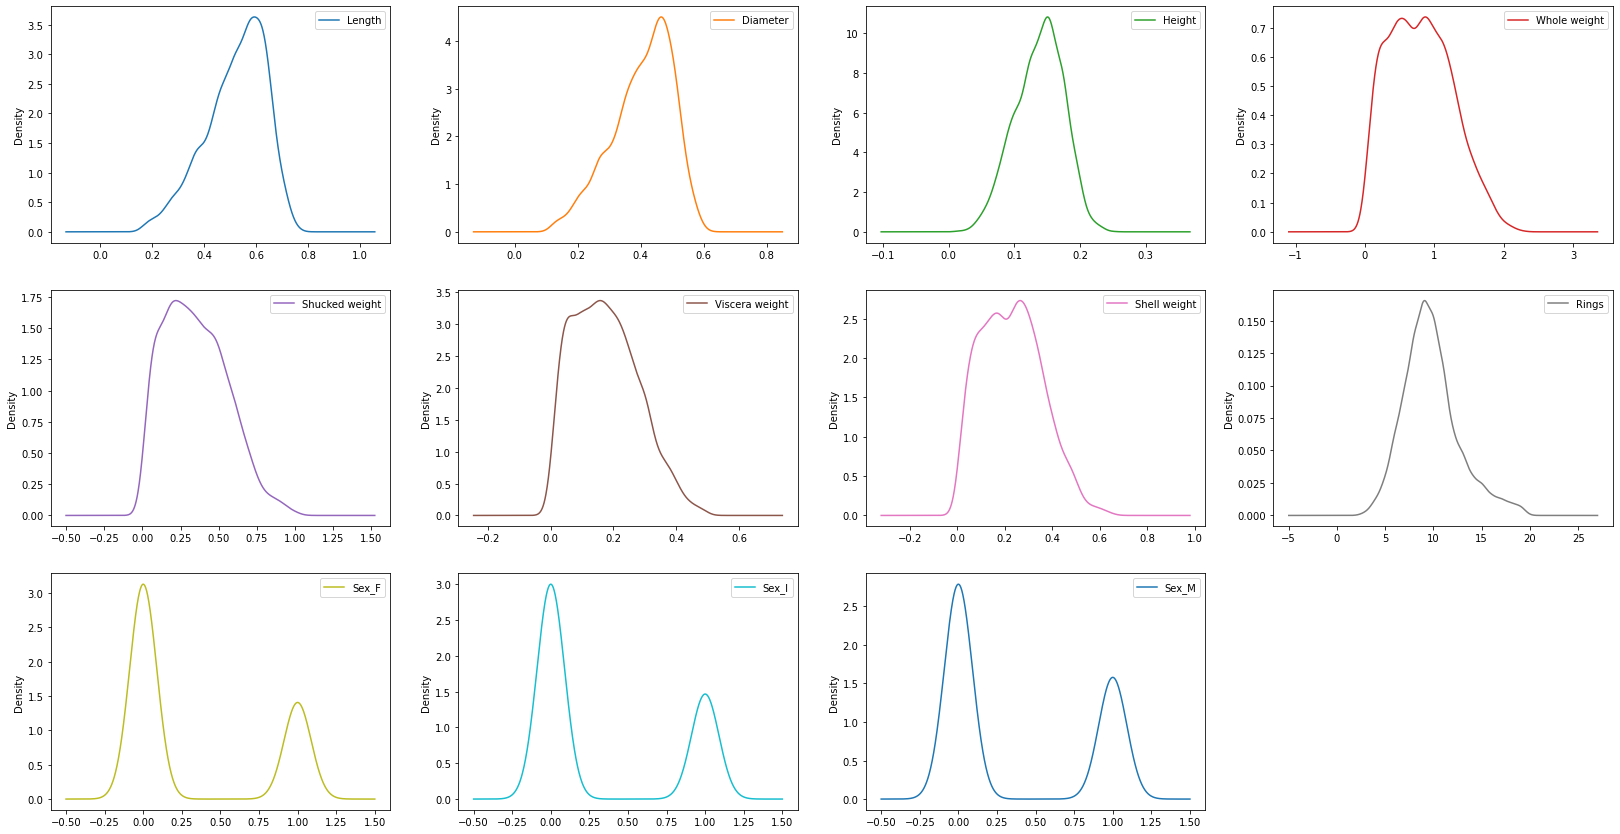

In [53]:
df1.plot(kind='density',subplots=True,layout=(4,4),figsize=(28,20),sharex=False)
plt.show()

In [54]:
df1.skew().sort_values(ascending=False)

Sex_F             0.821149
Sex_I             0.731618
Rings             0.725464
Sex_M             0.576507
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Whole weight      0.334204
Height           -0.244251
Diameter         -0.598650
Length           -0.623076
dtype: float64

Keeping the skewness threshold as 0.75 we see skewness in Height,Shucked weight,Age

### Splitting the dataframe in x and y

In [55]:
x = df1.drop('Rings',axis=1)
x.shape

(4027, 10)

In [56]:
y = df1['Rings']
y.shape

(4027,)

##### Using power_transform to normallize the data

In [57]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [58]:
type(x_new)

numpy.ndarray

In [59]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,-0.670525,-0.699088,1.328833
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,-0.670525,-0.699088,1.328833
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,1.491368,-0.699088,-0.752540
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,-0.670525,-0.699088,1.328833
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,-0.670525,1.430434,-0.752540
...,...,...,...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,1.491368,-0.699088,-0.752540
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,-0.670525,-0.699088,1.328833
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,-0.670525,-0.699088,1.328833
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,1.491368,-0.699088,-0.752540


In [60]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:xlabel='Rings', ylabel='count'>

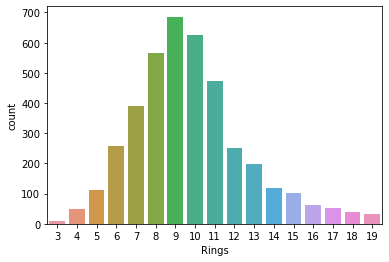

In [61]:
sns.countplot(y)

In [62]:
sm = SMOTE()
x_new,y_new = sm.fit_resample(x,y)

In [63]:
x_new.shape

(11662, 10)

<AxesSubplot:xlabel='Rings', ylabel='count'>

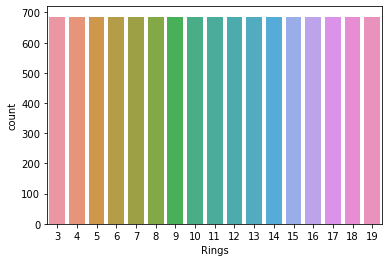

In [64]:
sns.countplot(y_new)

### Scaling the Model

In [65]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x_new = mms.fit_transform(x_new)
x_new

array([[0.32587672, 0.35159472, 0.27546358, ..., 0.        , 0.        ,
        1.        ],
       [0.1798726 , 0.17972166, 0.25645617, ..., 0.        , 0.        ,
        1.        ],
       [0.45400254, 0.46792148, 0.43673039, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.80894988, 0.84134486, 0.78529785, ..., 0.81217092, 0.        ,
        0.18782908],
       [0.47566056, 0.4630112 , 0.50701074, ..., 0.        , 0.        ,
        1.        ],
       [0.64898263, 0.67713532, 0.6647503 , ..., 1.        , 0.        ,
        0.        ]])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression()
max_accuracy = 0
max_random_state = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc> max_accuracy:
        max_accuracy = acc
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.30261465923703385 for random_state 10


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=.20,random_state=10)
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.30261465923703385
              precision    recall  f1-score   support

           3       0.68      0.94      0.79       163
           4       0.51      0.50      0.51       138
           5       0.43      0.39      0.41       145
           6       0.43      0.41      0.42       155
           7       0.24      0.31      0.27       130
           8       0.30      0.34      0.32       139
           9       0.18      0.13      0.15       148
          10       0.15      0.11      0.13       131
          11       0.21      0.38      0.27       127
          12       0.14      0.17      0.15       136
          13       0.15      0.03      0.05       141
          14       0.17      0.21      0.19       129
          15       0.22      0.03      0.05       141
          16       0.22      0.23      0.23       141
          17       0.27      0.18      0.22       119
          18       0.24      0.35      0.28       121
          19       0.23      0.32      0.27       129

    ac

In [69]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv = cross_val_score(lr,x_new,y_new,cv=j)
    cv_score = cv.mean()
    print('at', j, 'Cross Validation score is', cv_score*100 ,'and accuracy score is 30')

at 2 Cross Validation score is 27.25090036014406 and accuracy score is 30
at 3 Cross Validation score is 27.679676777750608 and accuracy score is 30
at 4 Cross Validation score is 27.602463018256174 and accuracy score is 30
at 5 Cross Validation score is 27.585426930629886 and accuracy score is 30
at 6 Cross Validation score is 27.782613821766716 and accuracy score is 30
at 7 Cross Validation score is 27.696793002915456 and accuracy score is 30
at 8 Cross Validation score is 27.756959213973882 and accuracy score is 30
at 9 Cross Validation score is 27.868251849733326 and accuracy score is 30


In [87]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=.20,random_state=91)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    cv = cross_val_score(model,x_new,y_new,cv=3)
    cv_score = cv.mean()
    print('Report for ', model)
    print('The Accuracy score is', accuracy)
    print(classification_report(y_test,pred))
    print('The Cross-Validation Score is', cv_score)

In [72]:
Model(lr)

Report for  LogisticRegression()
The Accuracy score is 0.30261465923703385
              precision    recall  f1-score   support

           3       0.68      0.94      0.79       163
           4       0.51      0.50      0.51       138
           5       0.43      0.39      0.41       145
           6       0.43      0.41      0.42       155
           7       0.24      0.31      0.27       130
           8       0.30      0.34      0.32       139
           9       0.18      0.13      0.15       148
          10       0.15      0.11      0.13       131
          11       0.21      0.38      0.27       127
          12       0.14      0.17      0.15       136
          13       0.15      0.03      0.05       141
          14       0.17      0.21      0.19       129
          15       0.22      0.03      0.05       141
          16       0.22      0.23      0.23       141
          17       0.27      0.18      0.22       119
          18       0.24      0.35      0.28       121
      

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
Model(dt)

Report for  DecisionTreeClassifier()
The Accuracy score is 0.5855122160308616
              precision    recall  f1-score   support

           3       0.94      0.94      0.94       163
           4       0.81      0.86      0.83       138
           5       0.78      0.74      0.76       145
           6       0.57      0.55      0.56       155
           7       0.45      0.47      0.46       130
           8       0.37      0.29      0.33       139
           9       0.17      0.15      0.16       148
          10       0.25      0.24      0.24       131
          11       0.30      0.28      0.29       127
          12       0.44      0.57      0.50       136
          13       0.58      0.51      0.54       141
          14       0.58      0.63      0.60       129
          15       0.62      0.60      0.61       141
          16       0.70      0.70      0.70       141
          17       0.72      0.84      0.78       119
          18       0.74      0.79      0.77       121
   

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Model(rf)

Report for  RandomForestClassifier()
The Accuracy score is 0.7218174024860694
              precision    recall  f1-score   support

           3       0.95      0.99      0.97       154
           4       0.92      0.83      0.87       156
           5       0.85      0.87      0.86       133
           6       0.65      0.77      0.71       134
           7       0.61      0.63      0.62       151
           8       0.42      0.46      0.44       136
           9       0.29      0.21      0.24       144
          10       0.36      0.26      0.30       142
          11       0.49      0.52      0.50       120
          12       0.68      0.69      0.69       124
          13       0.74      0.71      0.73       136
          14       0.82      0.80      0.81       133
          15       0.78      0.85      0.82       135
          16       0.84      0.91      0.88       131
          17       0.81      0.93      0.87       123
          18       0.88      0.91      0.89       143
   

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
Model(etc)

Report for  ExtraTreesClassifier()
The Accuracy score is 0.7445349335619375
              precision    recall  f1-score   support

           3       0.96      0.99      0.97       154
           4       0.95      0.89      0.92       156
           5       0.90      0.90      0.90       133
           6       0.71      0.82      0.76       134
           7       0.65      0.68      0.66       151
           8       0.40      0.43      0.41       136
           9       0.31      0.22      0.25       144
          10       0.39      0.32      0.35       142
          11       0.49      0.54      0.51       120
          12       0.75      0.69      0.72       124
          13       0.80      0.75      0.77       136
          14       0.87      0.83      0.85       133
          15       0.76      0.85      0.80       135
          16       0.87      0.94      0.90       131
          17       0.85      0.93      0.89       123
          18       0.86      0.92      0.89       143
     

In [242]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for  SVC()
The Accuracy score is 0.32876125160737246
              precision    recall  f1-score   support

           3       0.69      0.89      0.77       154
           4       0.64      0.56      0.59       156
           5       0.47      0.49      0.48       133
           6       0.43      0.46      0.44       134
           7       0.37      0.32      0.34       151
           8       0.22      0.32      0.26       136
           9       0.32      0.20      0.25       144
          10       0.19      0.09      0.12       142
          11       0.17      0.28      0.21       120
          12       0.14      0.10      0.11       124
          13       0.17      0.04      0.07       136
          14       0.22      0.20      0.21       133
          15       0.26      0.30      0.28       135
          16       0.51      0.20      0.29       131
          17       0.22      0.35      0.27       123
          18       0.30      0.15      0.20       143
          19       0.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
Model(knn)

Report for  KNeighborsClassifier()
The Accuracy score is 0.6686669524217745
              precision    recall  f1-score   support

           3       0.90      0.99      0.94       163
           4       0.83      0.91      0.87       138
           5       0.78      0.78      0.78       145
           6       0.59      0.64      0.61       155
           7       0.44      0.48      0.46       130
           8       0.42      0.34      0.37       139
           9       0.38      0.22      0.28       148
          10       0.29      0.20      0.23       131
          11       0.44      0.36      0.40       127
          12       0.54      0.62      0.58       136
          13       0.71      0.63      0.67       141
          14       0.73      0.76      0.75       129
          15       0.75      0.82      0.79       141
          16       0.76      0.85      0.81       141
          17       0.78      0.92      0.84       119
          18       0.80      0.90      0.84       121
     

### Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entropy'],'n_estimators':list(range(1,100,20)),'max_depth':[4,5,6,7,8],'max_features':["auto", "sqrt", "log2"]}

In [82]:
gcv = GridSearchCV(etc,parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 41}

In [83]:
gcv.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                     n_estimators=41)

In [92]:
etc = ExtraTreesClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                     n_estimators=41)

In [93]:
Model(etc)

Report for  ExtraTreesClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                     n_estimators=41)
The Accuracy score is 0.4560651521645949
              precision    recall  f1-score   support

           3       0.72      0.95      0.82       154
           4       0.62      0.47      0.54       156
           5       0.52      0.49      0.50       133
           6       0.42      0.57      0.48       134
           7       0.44      0.34      0.39       151
           8       0.27      0.39      0.32       136
           9       0.33      0.19      0.24       144
          10       0.24      0.14      0.18       142
          11       0.30      0.27      0.28       120
          12       0.30      0.15      0.20       124
          13       0.61      0.12      0.21       136
          14       0.43      0.44      0.43       133
          15       0.50      0.39      0.44       135
          16       0.53      0.60      0.56       131
          17       0.5

we see that the the Scores Decrease significantly after Hyper Parameter Tuning so we select the model without Hyper Parameter Tuning

# Final Model : ExtraTree Classifier without Hyper parameter tuning

In [99]:
etc = ExtraTreesClassifier()
Model(etc)

Report for  ExtraTreesClassifier()
The Accuracy score is 0.7462494642091727
              precision    recall  f1-score   support

           3       0.97      0.99      0.98       154
           4       0.95      0.89      0.92       156
           5       0.90      0.90      0.90       133
           6       0.72      0.81      0.76       134
           7       0.63      0.67      0.65       151
           8       0.39      0.41      0.40       136
           9       0.32      0.23      0.27       144
          10       0.39      0.31      0.35       142
          11       0.51      0.56      0.53       120
          12       0.72      0.73      0.73       124
          13       0.83      0.76      0.79       136
          14       0.89      0.84      0.86       133
          15       0.76      0.85      0.80       135
          16       0.84      0.94      0.88       131
          17       0.86      0.91      0.89       123
          18       0.86      0.92      0.89       143
     

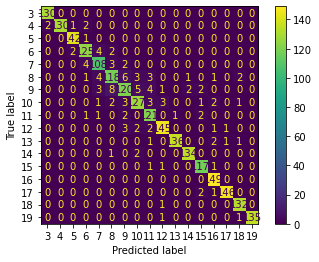

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(etc,x_test,y_test)
plt.show()

### Saving the model

In [283]:
import pickle
filename = 'Abalone_Age_Prediction'
pickle.dump(rf,open(filename,'wb'))